<a href="https://colab.research.google.com/github/Gh0st116/clothes-classification/blob/main/clothes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

# Loading Dataset

In [2]:
# Loading dataset from Keras MNIST and separating into train and test data
dataset = keras.datasets.fashion_mnist
((train_imgs, train_ids), (test_imgs, test_ids)) = dataset.load_data()

In [3]:
print(train_imgs)
print(len(train_imgs), "train images")
print(f"train shape: {train_imgs.shape}")
print(f"test shape: {test_imgs.shape}")

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
60000 train images
train shape: (60000, 28, 28)
test shape: (10000, 28, 28)


# Train Images

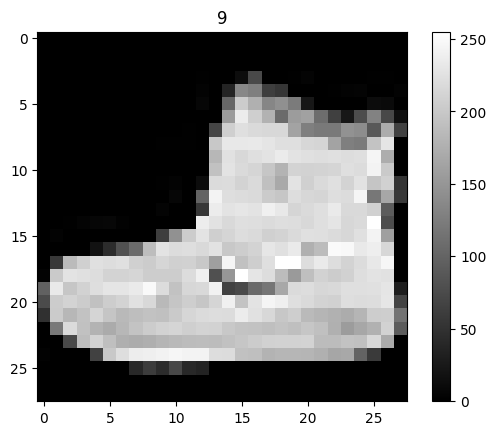

In [4]:
# Print first image in dataset in grayscale
plt.imshow(train_imgs[0], cmap='gray')
plt.title(train_ids[0])
plt.colorbar()

In [5]:
total_classifications = train_ids.max() + 1
name_classifications = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                        "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

total_classifications

10

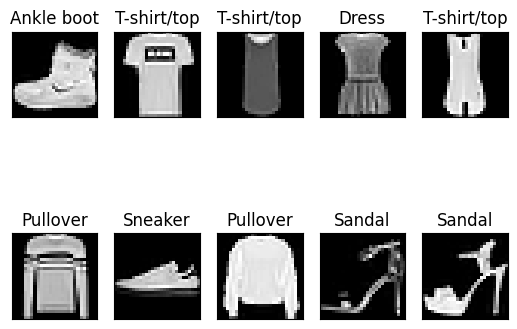

In [6]:
for img in range(10):
  plt.subplot(2, 5, img + 1)
  plt.imshow(train_imgs[img], cmap='gray')
  plt.title(name_classifications[train_ids[img]])
  plt.xticks([])
  plt.yticks([])

# Creating Model

In [7]:
# Normalizing images
train_imgs = train_imgs / 255.0

In [8]:
model = keras.Sequential([
    # Input
    keras.layers.Flatten(input_shape=(28, 28)),
    # Processing
    keras.layers.Dense(412, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    # Output
    keras.layers.Dense(total_classifications, activation=tf.nn.softmax)
])

# Compiling
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 412)               323420    
                                                                 
 dropout (Dropout)           (None, 412)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                4130      
                                                                 
Total params: 327,550
Trainable params: 327,550
Non-trainable params: 0
_________________________________________________________________
None


## Fitting

In [9]:
history = model.fit(train_imgs, train_ids, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 22s 14ms/step - loss: 0.5218 - accuracy: 0.8131 - val_loss: 0.4463 - val_accuracy: 0.8392
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3923 - accuracy: 0.8568 - val_loss: 0.3822 - val_accuracy: 0.8589
Epoch 3/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3594 - accuracy: 0.8672 - val_loss: 0.3545 - val_accuracy: 0.8716
Epoch 4/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.3362 - accuracy: 0.8746 - val_loss: 0.3433 - val_accuracy: 0.8724
Epoch 5/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3213 - accuracy: 0.8813 - val_loss: 0.3466 - val_accuracy: 0.8742
Epoch 6/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3059 - accuracy: 0.8849 - val_loss: 0.3197 - val_accuracy: 0.8832
Epoch 7/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.2919 - accuracy: 0.8903 - val_loss: 0.3299 - v

## Saving model

In [22]:
model.save("model_clothes_10epochs_3nodes.h5")
saved_model = load_model("model_clothes_10epochs_3nodes.h5")

# Plotting metrics

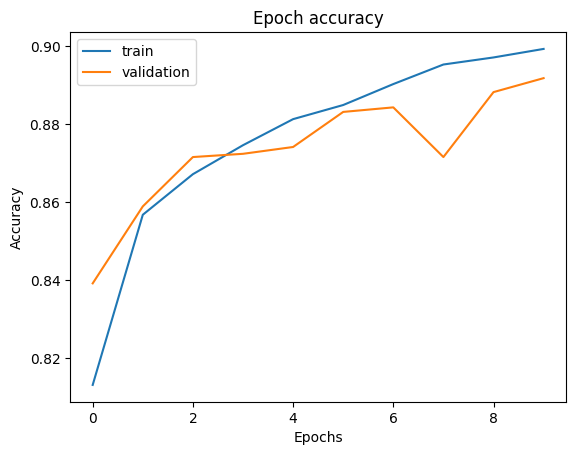

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Epoch accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "validation"])

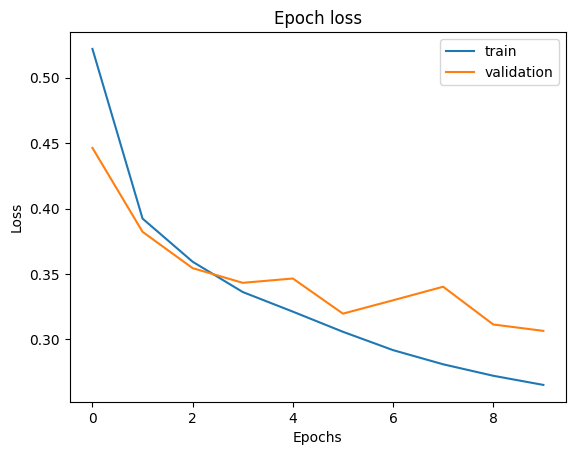

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Epoch loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "validation"])

# Model predictions

In [20]:
tests = model.predict(test_imgs)
print(f"Image predict: {name_classifications[np.argmax(tests[0])]}")

tests_saved_model = saved_model.predict(test_imgs)
print(f"Image predict of saved model: {name_classifications[np.argmax(tests_saved_model[0])]}")

print(f"Actual value: {name_classifications[train_ids[0]]}")

313/313 [==============================] - 1s 2ms/step
Image predict: Ankle boot
313/313 [==============================] - 1s 2ms/step
Image predict of saved model: Ankle boot
Actual value: Ankle boot


# Evaluating model

In [13]:
loss_test, accuracy_test = model.evaluate(test_imgs, test_ids)

print(f"Loss: {loss_test}")
print(f"Accuracy: {accuracy_test}")

313/313 [==============================] - 1s 3ms/step - loss: 49.3099 - accuracy: 0.8764
Loss: 49.30991744995117
Accuracy: 0.8763999938964844
